## Combine Perf Curves
Ryan Peruski, 07/21/23 - Takes Perf curves from Experiments folder and grabs necessary information.

In [99]:
#Imports and one helper function
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, auc
import numpy as np
from filter import filter_passengers
import warnings
warnings.filterwarnings("ignore")
def modify_labels_acc(scores, labels, thres):
    for i in range(len(scores)):
        if scores[i] >= thres:
            labels[i] = 1
        else:
            labels[i] = 0
    return labels

In [100]:
#Front perf info
df_odf = pd.read_json('/root/BlurImageTrainingProject/Experiments/VTTI_Results/VTTI_front_perfs.json')
df_icf = pd.read_json('/root/BlurImageTrainingProject/Experiments/EfficientNet_Front_Results/EfficientNetB7_2_perfs.json')
df_ref = pd.read_json('/root/BlurImageTrainingProject/Experiments/ResNet18_Front_Results/ResNet18_4_perfs.json')
df_vit = pd.read_json('/root/BlurImageTrainingProject/Experiments/ViT_Front_Results/ViT_2_perfs.json')
df_rtf = pd.read_json('/root/BlurImageTrainingProject/Experiments/Retina_Results/Retina_front_perfs.json')
df_clpz = pd.read_json('/root/BlurImageTrainingProject/Experiments/CLIP/CLIP_Front_perfs.json')
df_clpf = pd.read_json('/root/BlurImageTrainingProject/Experiments/CLIP_Front_Results/CLIP_7_perfs.json')
dfs = {'VTTI Faster-RCNN':df_odf, 'EfficientNetB7':df_icf, "Vision Transformer B 16":df_vit, "RetinaFace":df_rtf, "CLIP Zero-Shot":df_clpz, "CLIP Fine-Tuned":df_clpf, "ResNet18":df_ref}

In [101]:
#Only looking at front passengers, not drivers
for key in dfs.keys():
    filter_passengers(dfs[key])

#Nice, neat arrays for each model and metric
icf_predictions = df_icf['y_pred'].to_numpy()
icf_targets = df_icf['y_true'].to_numpy()
icf_scores = df_icf['y_scores'].to_numpy()

ref_predictions = df_ref['y_pred'].to_numpy()
ref_targets = df_ref['y_true'].to_numpy()
ref_scores = df_ref['y_scores'].to_numpy()

odf_predictions = df_odf['y_pred'].to_numpy()
odf_targets = df_odf['y_true'].to_numpy()
odf_scores = df_odf['y_scores'].to_numpy()

vit_predictions = df_vit['y_pred'].to_numpy()
vit_targets = df_vit['y_true'].to_numpy()
vit_scores = df_vit['y_scores'].to_numpy()

rtf_predictions = df_rtf['y_pred'].to_numpy()
rtf_targets = df_rtf['y_true'].to_numpy()
rtf_scores = df_rtf['y_scores'].to_numpy()

clpz_predictions = df_clpz['y_pred'].to_numpy()
clpz_targets = df_clpz['y_true'].to_numpy()
clpz_scores = df_clpz['y_scores'].to_numpy()

clpf_predictions = df_clpf['y_pred'].to_numpy()
clpf_targets = df_clpf['y_true'].to_numpy()
clpf_scores = df_clpf['y_scores'].to_numpy()

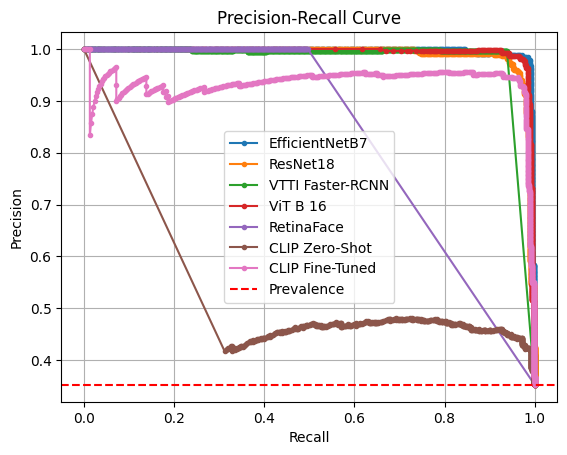

In [102]:
# Precision-Recall Curve - Front
precision, recall, _ = precision_recall_curve(icf_targets, icf_scores)
plt.figure()
plt.plot(recall, precision, marker='.', label='EfficientNetB7')
precision, recall, _ = precision_recall_curve(ref_targets, ref_scores)
plt.plot(recall, precision, marker='.', label='ResNet18')
precision, recall, _ = precision_recall_curve(odf_targets, odf_scores)
prevalence = np.sum(clpz_targets) / len(clpz_targets)
precision[0] = prevalence
plt.plot(recall, precision, marker='.', label='VTTI Faster-RCNN')
precision, recall, _ = precision_recall_curve(vit_targets, vit_scores)
plt.plot(recall, precision, marker='.', label='ViT B 16')
precision, recall, _ = precision_recall_curve(rtf_targets, rtf_scores)
#Fixed small bug here
prevalence = np.sum(clpz_targets) / len(clpz_targets)
precision[0] = prevalence
plt.plot(recall, precision, marker='.', label='RetinaFace')
precision, recall, _ = precision_recall_curve(clpz_targets, clpz_scores)
plt.plot(recall, precision, marker='.', label='CLIP Zero-Shot')
precision, recall, _ = precision_recall_curve(clpf_targets, clpf_scores)
plt.plot(recall, precision, marker='.', label='CLIP Fine-Tuned')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)

# Plot Prevalence Threshold
plt.axhline(y=prevalence, color='r', linestyle='--', label='Prevalence')
plt.legend()
#plt.show()
plt.savefig('precision_recall_curve.png')

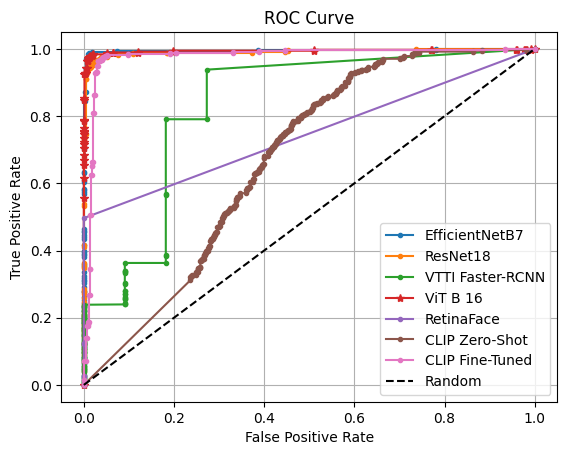

In [103]:
# ROC curve - Front
fpr, tpr, _ = roc_curve(icf_targets, icf_scores)
roc_auc = roc_auc_score(icf_targets, icf_scores)
plt.figure()
plt.plot(fpr, tpr, marker='.', label=f'EfficientNetB7')
fpr, tpr, _ = roc_curve(ref_targets, ref_scores)
roc_auc = roc_auc_score(ref_targets, ref_scores)
plt.plot(fpr, tpr, marker='.', label=f'ResNet18')
fpr, tpr, _ = roc_curve(odf_targets, odf_scores)
roc_auc = roc_auc_score(odf_targets, odf_scores)
plt.plot(fpr, tpr, marker='.', label=f'VTTI Faster-RCNN')
fpr, tpr, _ = roc_curve(vit_targets, vit_scores)
roc_auc = roc_auc_score(vit_targets, vit_scores)
plt.plot(fpr, tpr, marker='*', label=f'ViT B 16')
fpr, tpr, _ = roc_curve(rtf_targets, rtf_scores)
roc_auc = roc_auc_score(rtf_targets, rtf_scores)
plt.plot(fpr, tpr, marker='.', label=f'RetinaFace')
fpr, tpr, _ = roc_curve(clpz_targets, clpz_scores)
roc_auc = roc_auc_score(clpz_targets, clpz_scores)
plt.plot(fpr, tpr, marker='.', label=f'CLIP Zero-Shot')
fpr, tpr, thres = roc_curve(clpf_targets, clpf_scores)
roc_auc = roc_auc_score(clpf_targets, clpf_scores)
plt.plot(fpr, tpr, marker='.', label=f'CLIP Fine-Tuned')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve'.format(roc_auc))
plt.grid(True)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random') #Plot y = x line
plt.legend()
plt.show()
plt.savefig('roc_curve.png')

In [104]:
# Back perf info
df_odb = pd.read_json('/root/BlurImageTrainingProject/Experiments/VTTI_Results/VTTI_back_perfs.json')
df_icb = pd.read_json('/root/BlurImageTrainingProject/Experiments/EfficientNet_Back_Results/EfficientNetB7_7_perfs.json')
df_reb = pd.read_json('/root/BlurImageTrainingProject/Experiments/ResNet18_Back_Results/ResNet18_7_perfs.json')
df_vib = pd.read_json('/root/BlurImageTrainingProject/Experiments/ViT_Back_Results/ViT_7_perfs.json')
df_rtb = pd.read_json('/root/BlurImageTrainingProject/Experiments/Retina_Results/Retina_back_perfs.json')
df_clpzb = pd.read_json('/root/BlurImageTrainingProject/Experiments/CLIP/CLIP_Back_perfs.json')
df_clpfb = pd.read_json('/root/BlurImageTrainingProject/Experiments/CLIP_Back_Results/CLIP_0_perfs.json')
dfs_back = {'VTTI Faster-RCNN':df_odb, 'EfficientNetB7':df_icb, "Vision Transformer B 16":df_vib, "RetinaFace":df_rtb, "CLIP Zero-Shot":df_clpzb, "CLIP Fine-Tuned":df_clpfb, "ResNet18":df_reb}

In [105]:
#Back perf metrics
icf_predictions = df_icb['y_pred'].to_numpy()
icf_targets = df_icb['y_true'].to_numpy()
icf_scores = df_icb['y_scores'].to_numpy()

ref_predictions = df_reb['y_pred'].to_numpy()
ref_targets = df_reb['y_true'].to_numpy()
ref_scores = df_reb['y_scores'].to_numpy()

odf_predictions = df_odb['y_pred'].to_numpy()
odf_targets = df_odb['y_true'].to_numpy()
odf_scores = df_odb['y_scores'].to_numpy()

vit_predictions = df_vib['y_pred'].to_numpy()
vit_targets = df_vib['y_true'].to_numpy()
vit_scores = df_vib['y_scores'].to_numpy()

rtf_predictions = df_rtb['y_pred'].to_numpy()
rtf_targets = df_rtb['y_true'].to_numpy()
rtf_scores = df_rtb['y_scores'].to_numpy()

clpz_predictions = df_clpzb['y_pred'].to_numpy()
clpz_targets = df_clpzb['y_true'].to_numpy()
clpz_scores = df_clpzb['y_scores'].to_numpy()

clpf_predictions = df_clpfb['y_pred'].to_numpy()
clpf_targets = df_clpfb['y_true'].to_numpy()
clpf_scores = df_clpfb['y_scores'].to_numpy()

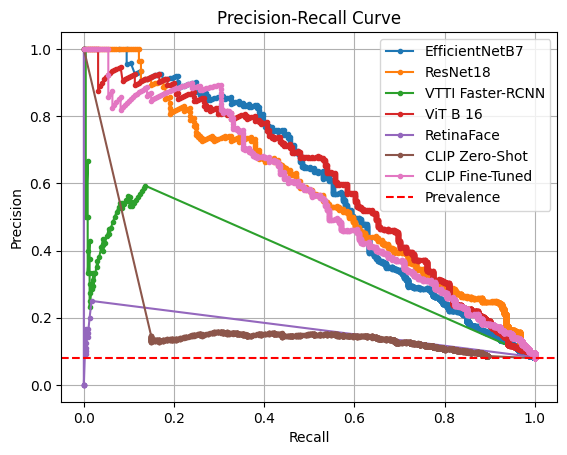

In [106]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(icf_targets, icf_scores)
plt.figure()
plt.plot(recall, precision, marker='.', label='EfficientNetB7')
precision, recall, _ = precision_recall_curve(ref_targets, ref_scores)
plt.plot(recall, precision, marker='.', label='ResNet18')
precision, recall, _ = precision_recall_curve(odf_targets, odf_scores)
plt.plot(recall, precision, marker='.', label='VTTI Faster-RCNN')
precision, recall, _ = precision_recall_curve(vit_targets, vit_scores)
plt.plot(recall, precision, marker='.', label='ViT B 16')
precision, recall, _ = precision_recall_curve(rtf_targets, rtf_scores)
plt.plot(recall, precision, marker='.', label='RetinaFace')
precision, recall, _ = precision_recall_curve(clpz_targets, clpz_scores)
plt.plot(recall, precision, marker='.', label='CLIP Zero-Shot')
precision, recall, thres = precision_recall_curve(clpf_targets, clpf_scores)
plt.plot(recall, precision, marker='.', label='CLIP Fine-Tuned')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)

# Plot Prevalence Threshold
prevalence = np.sum(clpz_targets) / len(clpz_targets)
plt.axhline(y=prevalence, color='r', linestyle='--', label='Prevalence')
plt.legend()
#plt.show()
plt.savefig('precision_recall_curve_back.png')

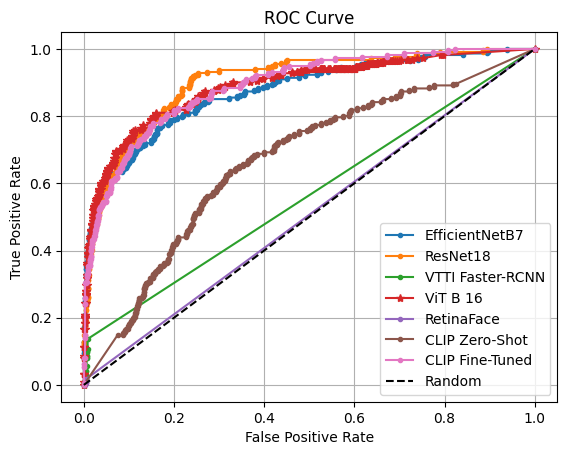

In [107]:
# ROC curve
fpr, tpr, _ = roc_curve(icf_targets, icf_scores)
roc_auc = roc_auc_score(icf_targets, icf_scores)
plt.figure()
plt.plot(fpr, tpr, marker='.', label=f'EfficientNetB7')
fpr, tpr, _ = roc_curve(ref_targets, ref_scores)
roc_auc = roc_auc_score(ref_targets, ref_scores)
plt.plot(fpr, tpr, marker='.', label=f'ResNet18')
fpr, tpr, _ = roc_curve(odf_targets, odf_scores)
roc_auc = roc_auc_score(odf_targets, odf_scores)
plt.plot(fpr, tpr, marker='.', label=f'VTTI Faster-RCNN')
fpr, tpr, _ = roc_curve(vit_targets, vit_scores)
roc_auc = roc_auc_score(vit_targets, vit_scores)
plt.plot(fpr, tpr, marker='*', label=f'ViT B 16')
fpr, tpr, _ = roc_curve(rtf_targets, rtf_scores)
roc_auc = roc_auc_score(rtf_targets, rtf_scores)
plt.plot(fpr, tpr, marker='.', label=f'RetinaFace')
fpr, tpr, _ = roc_curve(clpz_targets, clpz_scores)
roc_auc = roc_auc_score(clpz_targets, clpz_scores)
plt.plot(fpr, tpr, marker='.', label=f'CLIP Zero-Shot')
fpr, tpr, _ = roc_curve(clpf_targets, clpf_scores)
roc_auc = roc_auc_score(clpf_targets, clpf_scores)
plt.plot(fpr, tpr, marker='.', label=f'CLIP Fine-Tuned')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve'.format(roc_auc))
plt.grid(True)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random') #Plot y = x line
plt.legend()
#plt.show()
plt.savefig('roc_curve_back.png')

In [108]:
#Create tables for each kind of passenger
tprf = pd.DataFrame(columns={'Method':[], 'PR AUC':[], 'ROC AUC':[], 'F1 Score':[], 'Prec.':[], 'Rec.':[], "FPR*":[]})
tprb = pd.DataFrame(columns={'Method':[], 'PR AUC':[], 'ROC AUC':[], 'F1 Score':[], 'Prec.':[], 'Rec.':[], "FPR*":[]})

#Front
for key in dfs.keys():
    #Modify labels to be based off best F1-score
    precision, recall, thresholds = precision_recall_curve(dfs[key]['y_true'], dfs[key]['y_scores'])
    #Again, this fixes a bug - we always need to assume that the first threshold is at 0 exactly
    precision[0] = prevalence
    pr_auc = auc(recall, precision)
    f1_scores = [2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) for i in range(len(precision))]
    best_thres = np.array(thresholds)[np.nanargmax(f1_scores)]
    best_f1 = max(f1_scores)

    dfs[key]['y_pred'] = modify_labels_acc(dfs[key]["y_scores"], dfs[key]["y_pred"], best_thres)
    
    tpr, fpr, _= roc_curve(dfs[key]['y_true'], dfs[key]['y_scores'])
    #Do linear interpolation to find tpr at 0.78
    fpr = np.interp(0.78, fpr, tpr)
    #Precision and Recall 
    precision = precision_score(dfs[key]['y_true'], dfs[key]['y_pred'])
    recall = recall_score(dfs[key]['y_true'], dfs[key]['y_pred'])
    #F1 Score 
    f1 = 2 * (precision * recall) / (precision + recall)
    #AUC
    roc_auc = roc_auc_score(dfs[key]['y_true'], dfs[key]['y_scores'])
    #Accuracy
    acc = accuracy_score(dfs[key]['y_true'], dfs[key]['y_pred'])
    tprf.loc[len(tprf.index)] = {'Method':key, 'FPR*':fpr, 'ROC AUC':roc_auc, 'F1 Score':f1, 'Prec.':precision, 'Rec.':recall, 'PR AUC':pr_auc}

#Back
for key in dfs_back.keys():
    precision, recall, thresholds = precision_recall_curve(dfs_back[key]['y_true'], dfs_back[key]['y_scores'])
    precision[0] = prevalence
    pr_auc = auc(recall, precision)
    f1_scores = [2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) for i in range(len(precision))]
    best_thres = np.array(thresholds)[np.nanargmax(f1_scores)]
    best_f1 = max(f1_scores)

    dfs_back[key]['y_pred'] = modify_labels_acc(dfs_back[key]["y_scores"], dfs_back[key]["y_pred"], best_thres)

    tpr, fpr, _ = roc_curve(dfs_back[key]['y_true'], dfs_back[key]['y_scores'])
    #Do linear interpolation to find tpr at 0.78
    tpr = np.interp(0.78, fpr, tpr)
    precision = precision_score(dfs_back[key]['y_true'], dfs_back[key]['y_pred'])
    recall = recall_score(dfs_back[key]['y_true'], dfs_back[key]['y_pred'])
    #F1 Score (Equivalent to best_f1)
    f1 = 2 * (precision * recall) / (precision + recall)
    #AUC
    roc_auc = roc_auc_score(dfs_back[key]['y_true'], dfs_back[key]['y_scores'])
    #Accuracy
    acc = accuracy_score(dfs_back[key]['y_true'], dfs_back[key]['y_pred'])
    tprb.loc[len(tprb.index)] = {'Method':key, 'FPR*':tpr, 'ROC AUC':roc_auc, 'F1 Score':f1, 'Prec.':precision, 'Rec.':recall, 'PR AUC':pr_auc}

#Apply everything to round to 2 decimal places
tprf = tprf.round(2)
tprb = tprb.round(2)


In [109]:
tprf

,Method,PR AUC,ROC AUC,F1 Score,Prec.,Rec.,FPR*
0,VTTI Faster-RCNN,0.97,0.83,0.97,1.00,0.94,0.18
1,EfficientNetB7,1.00,1.00,0.98,0.98,0.99,0.00
2,Vision Transformer B 16,0.99,0.99,0.98,0.98,0.98,0.00
3,RetinaFace,0.77,0.75,0.66,1.00,0.50,0.56
4,CLIP Zero-Shot,0.54,0.67,0.61,0.46,0.93,0.46
5,CLIP Fine-Tuned,0.93,0.98,0.95,0.94,0.97,0.02
6,ResNet18,0.99,0.99,0.96,0.98,0.94,0.00


In [110]:
tprb

,Method,PR AUC,ROC AUC,F1 Score,Prec.,Rec.,FPR*
0,VTTI Faster-RCNN,0.36,0.56,0.22,0.59,0.14,0.75
1,EfficientNetB7,0.59,0.87,0.58,0.61,0.55,0.19
2,Vision Transformer B 16,0.61,0.89,0.59,0.67,0.53,0.15
3,RetinaFace,0.16,0.51,0.15,0.08,1.00,0.78
4,CLIP Zero-Shot,0.20,0.67,0.24,0.15,0.56,0.54
5,CLIP Fine-Tuned,0.56,0.89,0.54,0.57,0.52,0.17
6,ResNet18,0.58,0.90,0.55,0.52,0.58,0.16


In [111]:
#Save
tprf.to_csv('tprf.csv', index=False)
tprb.to_csv('tprb.csv', index=False)